In [14]:
import numpy as np
%matplotlib widget 
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from tqdm import tqdm
import math

In [35]:
low = 1
high = 10
diff = high - low

A = np.random.random(size = (3))*diff + low
B = np.random.random(size = (3))*diff + low
C = np.random.random(size = (3))*diff + low

tr = [A,B,C]

pt_internes = []
for _ in range(10000):
    a = np.random.rand()
    b = np.random.rand()*(1-a)
    c = 1 - a - b
    New_pt = c*C + a*A + b*B
    pt_internes.append(New_pt)

In [69]:
def projection(Tr,P):
    "projete le point x sur le triangle tr"
    # On projette les deux points sur le plan du triangle et on s'assure que c'est dedans
    A = Tr[0]
    B = Tr[1]
    C = Tr[2]
    #Calcul du vecteur normal
    N = np.cross(B-A,B-C)
    n = N/np.linalg.norm(N)
    d = np.dot(n,P-A)
    return P - d*n

def is_inside(Tr,P): # revoir this one
    "determine si un point P est à l'intérieur d'un triangle Tr"
    PA = A - P
    PB = B - P
    PC = C - P
    cpt = int(np.dot(PA,PB)>0) + int(np.dot(PB,PC)>0) + int(np.dot(PA,PC)>0)
    assert(cpt < 3), "Error dans le test"
    print(cpt)
    return cpt != 2

def in_prism(Tr,P):
    "determine si P est dans le prisme triangulare de Tr"
    P_proj = projection(Tr,P)
    return is_inside(Tr,P_proj)


def traverse(Tr,P,Q):
    "determine si PQ traverse le triangle Tr"
    if in_prism(Tr,P) or in_prism(Tr,Q):

        P_proj = projection(Tr,P)
        Q_proj = projection(Tr,Q)

        n_P = (P - P_proj)/np.linalg.norm(P-P_proj)
        n_Q = (Q - Q_proj)/np.linalg.norm(Q - Q_proj)

        assert abs(np.dot(n_Q,n_P)) in [0,1]  , "les vecteurs sont normaux et colinear"

        return np.dot(n_Q,n_P) <= 0
    return False




(2.0522992435007166, 9.98792759888568)

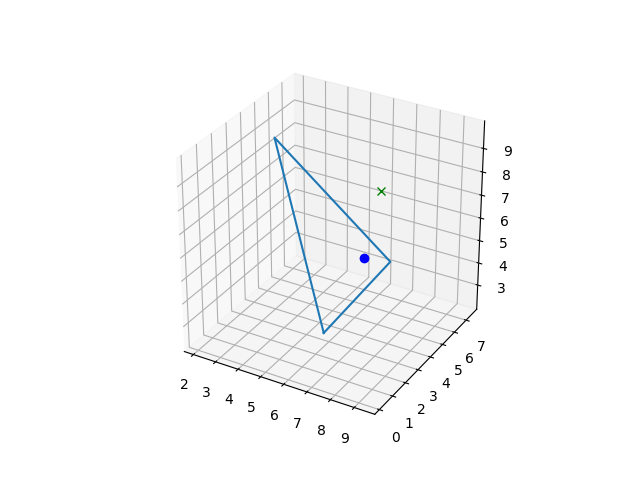

In [71]:
X,Y,Z = [],[],[]
P = P - np.array([1,1,1])
P_proj = projection(tr,P)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_aspect('equal')


xs = [ind[0] for ind in tr] + [tr[0][0]]
ys = [ind[1] for ind in tr] + [tr[0][1]]
zs = [ind[2] for ind in tr] + [tr[0][2]]
ax.plot(xs,ys,zs)

X = X + list(xs)
Y = Y + list(ys)
Z = Z + list(zs)


ax.plot(P[0],P[1],P[2],"x", color = "green")
ax.plot(P_proj[0],P_proj[1],P_proj[2],"o",color ="blue")
X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
max_range = np.array([X.max()-X.min(), Y.max()-Y.min(), Z.max()-Z.min()]).max() / 2.0 

mid_x = (X.max()+X.min()) * 0.5
mid_y = (Y.max()+Y.min()) * 0.5
mid_z = (Z.max()+Z.min()) * 0.5

ax.grid(True)

ax.set_xlim(mid_x - max_range, mid_x + max_range)
ax.set_ylim(mid_y - max_range, mid_y + max_range)
ax.set_zlim(mid_z - max_range, mid_z + max_range)

In [72]:
is_inside(tr,P_proj)

0


True